<a href="https://colab.research.google.com/github/JayaVishal23/Image-Compression/blob/main/image_size_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image=plt.imread('/content/img2.png')

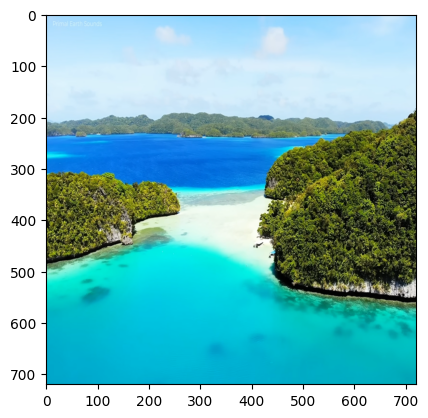

In [3]:
plt.imshow(image)

In [4]:
image=image[:,:,:3]

In [7]:
pixles=np.reshape(image,(image.shape[0]*image.shape[1],3))

In [8]:
def find_closest_centroid(X,centroids):
  K=centroids.shape[0] # number of centroids
  idx=np.zeros(X.shape[0],dtype=int) #to store the indices of the closest centroids for each data point

  for i in range(X.shape[0]):
    dist=[]
    for j in range(K):
      normij=np.linalg.norm(X[i]-centroids[j])
      dist.append(normij)
    idx[i]=np.argmin(dist)
  return idx

In [9]:
def compute_centroids(X,idx,K):
  m,n=X.shape
  centroids=np.zeros((K,n))
  for k in range(K):
    points=X[idx==k]
    centroids[k]=np.mean(points,axis=0)
  return centroids

In [10]:
K=25
max_ites=1
centroids = pixles[np.random.permutation(pixles.shape[0])[:K]]

In [11]:
for i in range(max_ites):
  idx=find_closest_centroid(pixles,centroids)
  new_centroids=compute_centroids(pixles,idx,K)

  if np.all(centroids == new_centroids):  # Check for convergence
    break
  centroids = new_centroids

In [12]:
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, image.shape)

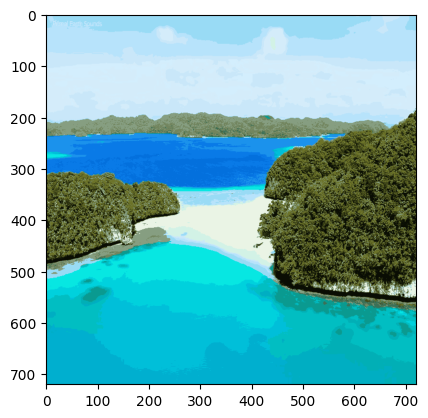

In [13]:
plt.imshow(X_recovered)

In [14]:
import os

original_size = os.path.getsize('/content/nature.png')
original_size

538566

In [15]:
from PIL import Image

compressed_img = Image.fromarray((X_recovered * 255).astype(np.uint8))
compressed_img.save('/content/compressed_nature.png')
compressed_size = os.path.getsize('/content/compressed_nature.png')
compressed_size

129380

In [16]:
reduction = ((original_size - compressed_size) / original_size) * 100
print(f"Size reduced by {reduction:.3f}%")

Size reduced by 75.977%
